# Cryptography (Group 5)

## Installing Libraries

In [1]:
#!pip install pyDHE
#!pip install tinyec
#!pip install pycryptodome

## Importing required packages 

In [2]:
#Importing required packages for implemetation of code
from tinyec import registry
import hashlib, secrets, binascii
from sympy import isprime
import random
import numpy as np
import time as t
import tracemalloc
import pyDHE
import pandas as pd
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
import matplotlib.pyplot as plt

In [3]:
#Message for Encyprtion
msg="Early computer-era cryptography Cryptanalysis of the new mechanical ciphering devices proved to be both difficult and laborious. In the United Kingdom, cryptanalytic efforts at Bletchley Park during WWII spurred the development of more efficient means for carrying out repetitious tasks, such as military code breaking (decryption)."

## Implementation of Rivest-Shamir-Adleman (RSA)

In [4]:
#Function to implement RSA algorithm
def rsa(msg): 
    start_rsa_eryt = t.time()
    #Key-Generation for RSA of 3072 bits
    keyPair = RSA.generate(3072) 
    #Generation of Public Key
    pubKey = keyPair.publickey() 
    print(f"Public key:  (n={hex(pubKey.n)}, e={hex(pubKey.e)})")
    #Generation of Public PEM Key
    pubKeyPEM = pubKey.exportKey() 
    print(pubKeyPEM.decode('ascii'))
    print(f"Private key: (n={hex(pubKey.n)}, d={hex(keyPair.d)})")
    #Generation of Private PEM Key
    privKeyPEM = keyPair.exportKey() 
    print(privKeyPEM.decode('ascii'))
    #Converting string message to bytes
    msg1=bytes(msg,'utf-8') 
    encryptor = PKCS1_OAEP.new(pubKey)
    #Encryting message
    encrypted = encryptor.encrypt(msg1) 
    print("Encrypted mesage using RSA:", binascii.hexlify(encrypted))
    end_rsa_eryt = t.time() 
    #Calculating time for RSA encryption
    eryt_time_rsa = end_rsa_eryt-start_rsa_eryt 
    print("Encryption Time for RSA: ",(eryt_time_rsa),"s")
    trial_encryption_rsa.append(eryt_time_rsa)
    start_rsa_dryt = t.time()
    decryptor = PKCS1_OAEP.new(keyPair)
    #Decryting message
    decrypted = decryptor.decrypt(encrypted) 
    print("Decrypted mesage using RSA:",decrypted)
    #Calculating time for RSA decryption
    end_rsa_dryt = t.time() 
    dryt_time_rsa = end_rsa_dryt-start_rsa_dryt
    print("Decryption Time for RSA: ",(dryt_time_rsa),"s")
    trial_decryption_rsa.append(dryt_time_rsa)

In [5]:
#Lists to save memory, encryption and decryption times from five trials
trial_memory_rsa=[]
trial_encryption_rsa=[]
trial_decryption_rsa=[]
#Implementation of RSA
print("Implementation of RSA")
for i in range(0,5):
    #Start of Trial
    print("Start of Trial",i)
    #Computing memory allocation for RSA using tracemalloc
    tracemalloc.start() 
    #Calling rsa function
    rsa(msg)
    #Computing memory for RSA implementation using tracemalloc
    mstart_rsa,mend_rsa=tracemalloc.get_traced_memory()
    #Computing total memory (end-start)
    mtotal_rsa=(mend_rsa-mstart_rsa)/1024
    print("Memory Used=",mtotal_rsa, "kB")
    tracemalloc.stop()
    trial_memory_rsa.append(mtotal_rsa)
    #End of Trial
    print("End of Trial",i)
    print("-------------------------------------------------------")
print("Memory used for all Trials in RSA implementation")
print(trial_memory_rsa)
print("Encryption Time used for all Trials in RSA implementation")
print(trial_encryption_rsa)
print("Decryption Time used for all Trials in RSA implementation")
print(trial_decryption_rsa)
memory_avg_rsa=sum(trial_memory_rsa)/5
print("Average Memory for RSA trials")
print(memory_avg_rsa)
encrpyt_time_avg_rsa=sum(trial_encryption_rsa)/5
print("Average Encryption Time for RSA trials")
print(encrpyt_time_avg_rsa)
decrpyt_time_avg_rsa=sum(trial_decryption_rsa)/5
print("Average Decryption Time for RSA trials")
print(decrpyt_time_avg_rsa)

Implementation of RSA
Start of Trial 0
Public key:  (n=0x99ca23cd8660081255d6f27408de6f25b7c6a5880403c773f2588a3e51fae5579593c6b6b670227e7290a638a03c70231453366c550b17e9cbb16ce1b1c4ef7573ae5e867c07250ad9902c520b5e707cd135b11c1d2f59e89ec1c7a479dc8be9b92068c6106e89dd312225c761a0a03d7ea09ec92000e7abcb92c8e215bd626ba5c18058de8f9f6f583d3ed3509ec61b4605c3df53d24d4a68e97b2160e263a754c0659d7033ffd9771122d3d3469af4a5065624c64061122996e6be6c967a5938226283573ea18a0cf870d9a5609367899d807c2a2567beafc42bb3c9559a7137d74316e83c96490cea72db71e6ac8dd9c62695fbc5fea8f8298321b03482bc6aef9ef9f85760b4d087e42951fb76836af6d09467491a231902bf673f24e5eca26207dff37ec7ca902e1ea486aa491716a47dc05b1247302aedfa529bf045cc329c7a6f9212c7aa5e79640a345d7c7a4ddb8d6d027c3c598c4cb0249395b846d2b477930302d4e19c435c285836dd0a2f37f834f7134aff3fcfecd9e22aa215, e=0x10001)
-----BEGIN PUBLIC KEY-----
MIIBojANBgkqhkiG9w0BAQEFAAOCAY8AMIIBigKCAYEAmcojzYZgCBJV1vJ0CN5v
JbfGpYgEA8dz8liKPlH65VeVk8a2tnAifnKQpjigPHAjFFM2bFULF+nLsWzhscTv
dXOuX

## Implementation of Diffie Hellman (DH)

In [6]:
#Function to implement Diffie Hellman algorithm
def DH_Exchange(A,B,publickey_N, publickey_G): 
    #Computing start time for DH Encrytion
    start_dh_eryt = t.time() 
    #Generation of shared key for A
    SharedKey_A=A.update(publickey_G) 
    #Generation of shared key for B
    SharedKey_B=B.update(publickey_N) 
    print("SharedKey:",SharedKey_B)
    encrypted_msg=""
    decrypted_msg=""
    #Implementing Encryption
    for c in msg:
        encrypted_msg += chr(ord(c)+(SharedKey_B%1000)) 
    print("Encrypted mesage using Diffie Hellman:",encrypted_msg)
    #Computing end time of DH Encrytion
    end_dh_eryt = t.time()
    eryt_time_dh = end_dh_eryt-start_dh_eryt
    print("Encryption Time for Diffie Hellman: ",eryt_time_dh, "s")
    trial_encryption_dh.append(eryt_time_dh)
    #Computing start time of DH Decryption
    start_dh_dryt = t.time()
    #Implementing Decryption
    for c in encrypted_msg: 
        decrypted_msg += chr(ord(c)-(SharedKey_B%1000))
    print("Decrypted mesage using Diffie Hellman:",decrypted_msg)
    #Computing end time of DH Decryption
    end_dh_dryt = t.time()
    dryt_time_dh = end_dh_dryt-start_dh_dryt
    print("Decryption Time for Diffie Hellman: ",dryt_time_dh, "s")
    trial_decryption_dh.append(dryt_time_dh)

In [7]:
#Implementation of Diffie Hellman
print("Implementation of Diffie Hellman")
#Lists to save memory, encryption and decryption times from five trials
trial_memory_dh=[]
trial_encryption_dh=[]
trial_decryption_dh=[]
for i in range(0,5):
    #Start of Trial
    print("Start of Trial",i)
    #Key generation for A
    A=pyDHE.new(18) 
    #Key generation for B
    B=pyDHE.new(18) 
    #Generate public key for A
    publickey_N=A.getPublicKey() 
    #Generate public key for B
    publickey_G=B.getPublicKey() 
    #Computing memory allocation for Diffie Hellman encryption
    tracemalloc.start() 
    #Calling DH_Exchange function to compute key exchange for Diffie Hellman
    DH_Exchange(A,B,publickey_N, publickey_G) 
    mstart_dh,mend_dh=tracemalloc.get_traced_memory()
    mtotal_dh=(mend_dh-mstart_dh)/1024
    #Priniting memory used by Diffie Hellma
    print("Memory used by Diffie Hellman:",mtotal_dh, "KB") 
    tracemalloc.stop()
    trial_memory_dh.append(mtotal_dh)
    #End of Trial
    print("End of Trial",i)
    print("-------------------------------------------------------")
print("Memory used for all Trials in DH implementation")
print(trial_memory_dh)
print("Encyption Time used for all Trials in DH implementation")
print(trial_encryption_dh)
print("Decryption Time used for all Trials in DH implementation")
print(trial_decryption_dh)
memory_avg_dh=sum(trial_memory_dh)/5
print("Average Memory for Diffie Hellman trials")
print(memory_avg_dh)
encrpyt_time_avg_dh=sum(trial_encryption_dh)/5
print("Average Encyption Time for Diffie Hellman trials")
print(encrpyt_time_avg_dh)
decrpyt_time_avg_dh=sum(trial_decryption_dh)/5
print("Average Decryption Time for Diffie Hellman trials")
print(decrpyt_time_avg_dh)

Implementation of Diffie Hellman
Start of Trial 0
SharedKey: 806697112857815731892954680546792523350294406985854064589926957672195272445190779940382130186906164218444200826976122836506205546302066677161656724074531098007158366921594035428761678467107460972157483183506931049071793425583846096420881649755214566441916465755043976050789861926542292775090684052067655068876440172226263795302609332567930642889620986116090443685085192564222028538894015047594103739290100247235023815600890528790516318435784413668458005310047116445214033018047971228427782614515866805773062833910844372036350493241126159291581180247775975271086399142337795851107359042922805911396117919315076750363072533694827363823852703316803748974506820402769021830510791914543250399273221737363654105330246592463530807826633289520555749556093684165871504559094954185036721310323189730309383575377958387694974940096325305241290164868738205050807088712699888816179966221020788435467981310038516741968536263702308966634164054967909182920

## Implementation of Elliptic Curve Diffie Hellman (ECDH)

In [8]:
#Function for converting secret keys into 256 bits
def ecc_point_to_256_bit_key(point):
    sha = hashlib.sha256(int.to_bytes(point.x, 32, 'big'))
    sha.update(int.to_bytes(point.y, 32, 'big'))
    return sha.digest() 

In [9]:
#Function for generating secret key and encrypting the message
def encrypt_ECDH(msg,pubKey):
    #Generating random private keys
    ciphertextPrivKey = secrets.randbelow(curve.field.n)  
    #Getting shared ECC key with help of DH public key
    sharedECCKey = ciphertextPrivKey * pubKey 
    #Generation of secret key forv ECC
    secretKey = ecc_point_to_256_bit_key(sharedECCKey)
    encrypted_msg=""
    #Encrypt message
    for c in msg: 
        encrypted_msg += chr(ord(c)+(int.from_bytes(secretKey,'big')%1000))
    print("Encrypted mesage using ECDH:",encrypted_msg)
    #Encryption using ECDH
    ciphertextPubKey = ciphertextPrivKey * curve.g 
    return secretKey, encrypted_msg,ciphertextPubKey

In [10]:
#Function for decrypting the message
def decrypt_ECDH(secretKey, encrypted_msg, ciphertextPubKey, privKey):
    decrypted_msg=""
    #Decrypt message
    for c in encrypted_msg:
        decrypted_msg += chr(ord(c)-(int.from_bytes(secretKey,'big')%1000))
    print("Decrypted mesage using ECDH:",decrypted_msg)
    return secretKey

In [11]:
#Lists to save memory, encryption and decryption times from five trials
trial_memory_ecdh=[]
trial_encryption_ecdh=[]
trial_decryption_ecdh=[]
#Implementation of ECDH
print("Implementation of ECDH")
for i in range(0,5):
    #Start of Trial
    print("Trial",i)
    #Generating curve for ECC
    curve = registry.get_curve('brainpoolP256r1') 
    #Generate private key for ECC
    privKey = secrets.randbelow(curve.field.n) 
    #Generate public key for ECC
    pubKey = privKey * curve.g 
    #Computing start time for ECDH encryption
    start_ecc_eryt = t.time() 
    #Computing memory allocation for ECDH encryption using tracemalloc 
    tracemalloc.start() 
    secretKey ,encrypt_msg, ECC_curve = encrypt_ECDH(msg, pubKey)
    #Computing end time for ECDH encryption
    end_ecc_eryt = t.time()
    eryt_time_ecc = end_ecc_eryt-start_ecc_eryt
    print("Encryption Time for ECDH: ",eryt_time_ecc, "s")
    trial_encryption_ecdh.append(eryt_time_ecc)
    #Computing start time for ECDH decryption
    start_ecc_dryt = t.time() 
    tracemalloc.start()
    decryptedMsg = decrypt_ECDH(secretKey, encrypt_msg, ECC_curve, privKey)
    print("ECC Curve Equation: (x,y) on (y^2=x^3+ax+b)", ECC_curve)
    mstart_ecc,mend_ecc=tracemalloc.get_traced_memory()
    mtotal_ecdh=(mend_ecc-mstart_ecc)/1024
    print("Memory used=",mtotal_ecdh, "kb")
    #Computing end time for ECDH decryption
    end_ecc_dryt = t.time()
    tracemalloc.stop()
    dryt_time_ecc = end_ecc_dryt-start_ecc_dryt
    print("Decryption Time for ECDH: ",dryt_time_ecc, "s")
    trial_decryption_ecdh.append(dryt_time_ecc)
    #Storing all trials memory results in trial_memory_ecdh list
    trial_memory_ecdh.append(mtotal_ecdh)
    #End of Trial
    print("End of Trial",i)
    print("-------------------------------------------------------")
print("Memory used for all Trials in ECDH implementation")
print(trial_memory_ecdh)
print("Encyption Time used for all Trials in ECDH implementation")
print(trial_encryption_ecdh)
print("Decryption Time used for all Trials in ECDH implementation")
print(trial_decryption_ecdh)
memory_avg_ecdh=sum(trial_memory_ecdh)/5
print("Average Memory for ECDH trials")
print(memory_avg_ecdh)
encrpyt_time_avg_ecdh=sum(trial_encryption_ecdh)/5
print("Average Encyption Time for ECDH trials")
print(encrpyt_time_avg_ecdh)
decrpyt_time_avg_ecdh=sum(trial_decryption_ecdh)/5
print("Average Decryption Time for ECDH trials")
print(decrpyt_time_avg_ecdh)

Implementation of ECDH
Trial 0
Encrypted mesage using ECDH: ͮΊΛΕ΢͉ΌΘΖΙΞΝΎΛ͖ΎΛΊ͉ΌΛ΢ΙΝΘΐΛΊΙΑ΢͉ͬΛ΢ΙΝΊΗΊΕ΢ΜΒΜ͉ΘΏ͉ΝΑΎ͉ΗΎΠ͉ΖΎΌΑΊΗΒΌΊΕ͉ΌΒΙΑΎΛΒΗΐ͉΍ΎΟΒΌΎΜ͉ΙΛΘΟΎ΍͉ΝΘ͉΋Ύ͉΋ΘΝΑ͉΍ΒΏΏΒΌΞΕΝ͉ΊΗ΍͉ΕΊ΋ΘΛΒΘΞΜ͉͗ͲΗ͉ΝΑΎ͉;ΗΒΝΎ΍͉ʹΒΗΐ΍ΘΖ͕͉ΌΛ΢ΙΝΊΗΊΕ΢ΝΒΌ͉ΎΏΏΘΛΝΜ͉ΊΝ͉ͫΕΎΝΌΑΕΎ΢͉͹ΊΛΔ͉΍ΞΛΒΗΐ͉΀΀ͲͲ͉ΜΙΞΛΛΎ΍͉ΝΑΎ͉΍ΎΟΎΕΘΙΖΎΗΝ͉ΘΏ͉ΖΘΛΎ͉ΎΏΏΒΌΒΎΗΝ͉ΖΎΊΗΜ͉ΏΘΛ͉ΌΊΛΛ΢ΒΗΐ͉ΘΞΝ͉ΛΎΙΎΝΒΝΒΘΞΜ͉ΝΊΜΔΜ͕͉ΜΞΌΑ͉ΊΜ͉ΖΒΕΒΝΊΛ΢͉ΌΘ΍Ύ͉΋ΛΎΊΔΒΗΐ͉͑΍ΎΌΛ΢ΙΝΒΘΗ͒͗
Encryption Time for ECDH:  1.0182101726531982 s
Decrypted mesage using ECDH: Early computer-era cryptography Cryptanalysis of the new mechanical ciphering devices proved to be both difficult and laborious. In the United Kingdom, cryptanalytic efforts at Bletchley Park during WWII spurred the development of more efficient means for carrying out repetitious tasks, such as military code breaking (decryption).
ECC Curve Equation: (x,y) on (y^2=x^3+ax+b) (9875344266606117566785719481040060996975948689376272976868059450104607878102, 17105116387362601459275581956185026291628781098173244260329556402591287440

## Visualizations

In [12]:
#Function for adding values to the bars 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

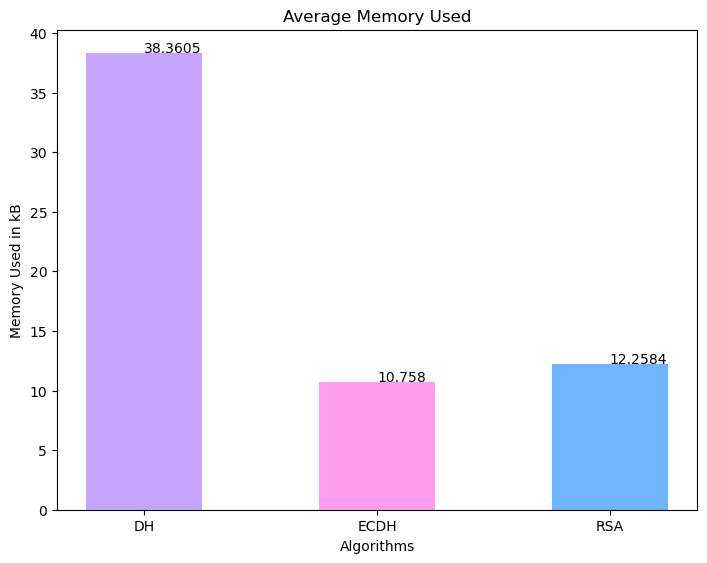

In [13]:
#Visualizing the Average Memory Used by all the algorithms - DH, ECDH, RSA
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['DH', 'ECDH', 'RSA']
plt.title("Average Memory Used")
plt.xlabel("Algorithms")
plt.ylabel("Memory Used in kB")
#Rounding off the average to 4 decimal places
memory = [round(memory_avg_dh,4),round(memory_avg_ecdh,4),round(memory_avg_rsa,4)]
addlabels(algo, memory)
ax.bar(algo,memory,width=0.5, color=['#C5A3FF','#FF9CEE','#6FB5FF'])
plt.show()

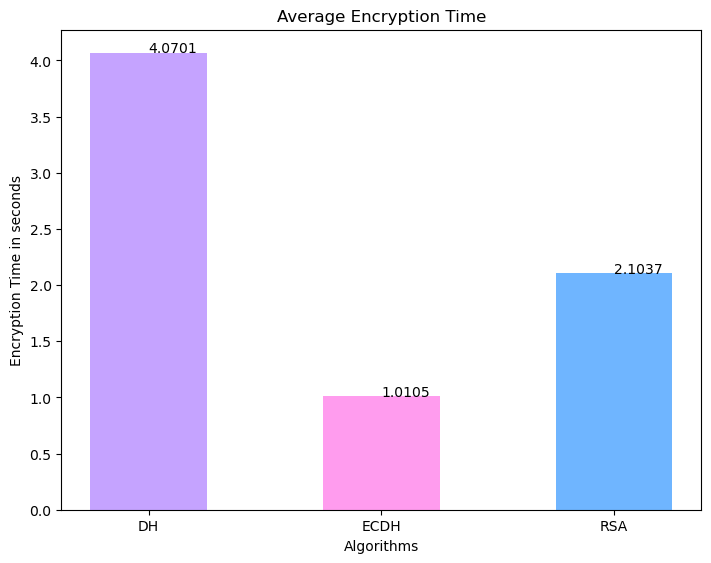

In [14]:
#Visualizing the Average Encryption Time used by all the algorithms - DH, ECDH, RSA
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
algo = ['DH', 'ECDH', 'RSA']
plt.title("Average Encryption Time")
plt.xlabel("Algorithms")
plt.ylabel("Encryption Time in seconds")
#Rounding off the average to 4 decimal places
encryption_time = [round(encrpyt_time_avg_dh,4),round(encrpyt_time_avg_ecdh,4),round(encrpyt_time_avg_rsa,4)]
addlabels(algo, encryption_time)
ax.bar(algo,encryption_time,width=0.5, color=['#C5A3FF','#FF9CEE','#6FB5FF'])
plt.show()

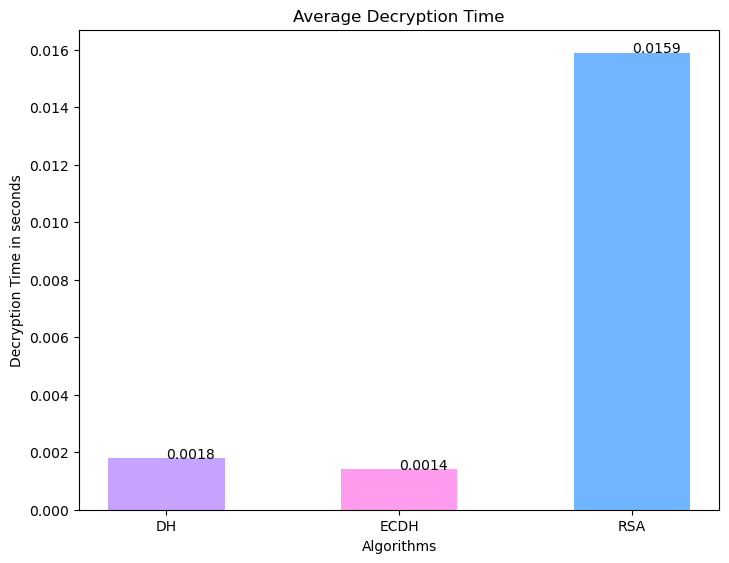

In [15]:
#Visualizing the Average Decryption Time used by all the algorithms - DH, ECDH, RSA
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
algo = ['DH', 'ECDH', 'RSA']
plt.title("Average Decryption Time")
plt.xlabel("Algorithms")
plt.ylabel("Decryption Time in seconds")
#Rounding off the average to 4 decimal places
decryption_time = [round(decrpyt_time_avg_dh,4),round(decrpyt_time_avg_ecdh,4),round(decrpyt_time_avg_rsa,4)]
addlabels(algo, decryption_time)
ax.bar(algo,decryption_time,width=0.5, color=['#C5A3FF','#FF9CEE','#6FB5FF'])
plt.show()